<div style="background-color: #e6f7ff; padding: 20px; border-radius: 10px; text-align: center; border: 1px solid #b3e0ff;">
    <h1 style="font-size: 2.5em; margin-bottom: 10px; color: #005580;">Project 1</h1>
    <h2 style="font-size: 2em; font-weight: normal; color: #007acc;">(Write Here: FIRSTNAME LASTNAME)</h2>
</div>

## How life burns your pockets during medical emergency?

This project is mainly focussed on **Storytelling** from a small dataset. The main aim of the project is to bring out the fun of data exploration and clustering techniques in a small dataset.

The data set is sourced from Kaggle and it seems like a abridged version of some insurance company's database. The main aim of the project with the data is to find the cost's dependencies of factors like BMI or body mass index, smoking habits, age and no of childrens and also roughly touches on the average spendings of males and females based on the above mentioned factors.

So without much ado lets begin the project by importing some of our dependencies. Following a brief description and their need in this project:-
1. OS: for file navigation from storage devices
2. Numpy for array and calculations
3. Pandas for data management including dataframes and series
4. Matplotlib and its subordinates like Pyplot, and Style
5. Sklearns StandardScaler for Data scaling
6. Sklearns KMeans, DBSCAN, and Agglomerative for clustering
7. Sklearns Silhouette_Samples and Silhouette_score are for calculating silhouette scores for each individual and whole data set respectively.

Note: we suggest creating an environment variable for your project, where you install all the needed dependencies. You can use the Anaconda navigator, or you can create one using the terminal.

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
# from matplotlib.ticker import MaxNLocator
# from statsmodels.formula.api import ols

### 1. Data Insites

In [4]:
# Download the dataset from the Github repository of the course. 

path="./insurance.csv"

#### 1.1 Use pandas to load the CSV file [2 Points]
Store the dataframe in a variable named 'raw_data'

In [6]:
# <write your code here>

#### 1.2 Extract more info from the dataset (hint: use .info()) [2 Points]

In [7]:
# <write your code here>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 More overview of the data are follows: we have around 3 object variables and 4 continuous variables and all the categories are non-null.

#### 1.3 Drop the categorical variables so we can extract some insights from the continious variables. [2 Points]
Store the new dataframe in a variable named 'raw_data_c'

Use the describe() function to plot some statistics from the extracted data

In [9]:
# <write your code here>
#

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the desription of data we find, except *Charges*, other features don't have much **outliers**

#### 1.4 Check if there is any null values from the whole dataset (i.e. using raw_data) [2 Points]

In [10]:
# <write your code here>

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 2. Data Visualization and Analysis

**Basic Histogram**

*To find the nature of data*

The basic histogram, called by the **hist()** function gives a visual represention of the distribution of the data based on the *Normal distribution*. From this graph we can understand:-
1. Data type of each variable: "Continuous variables" will have a continuous normal distribution curve. "Categorical variable" will have distinct plots.
2. Skewness of data highlights the presence of **outliers**.


#### 2.1 Create Histograms [2 Points]

Your task is to create four histograms for the following features: age, bmi, charges, and region.

Text(0.5, 0, 'Region')

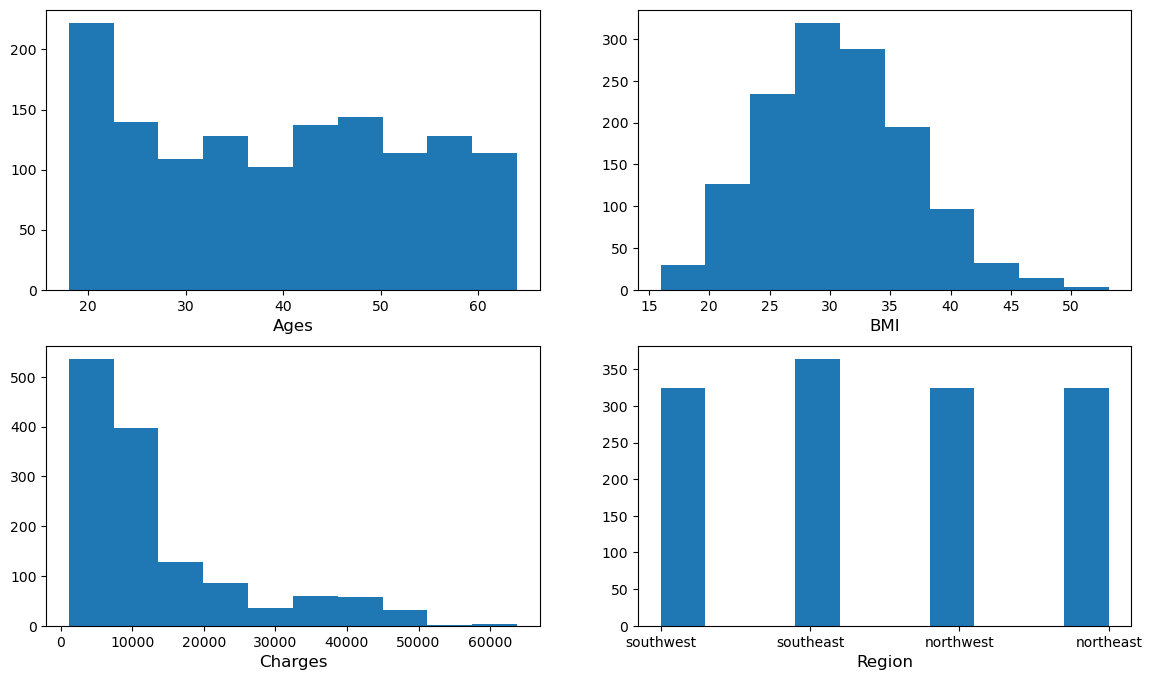

In [12]:
# <write your code here>

#### 2.2 Get the correlation matrix on the numerical features (i.e. raw_data_c) [3 Points]

In [15]:
# <write your code here>

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### 2.3 Create the correlation plot [3 Points]

<Axes: >

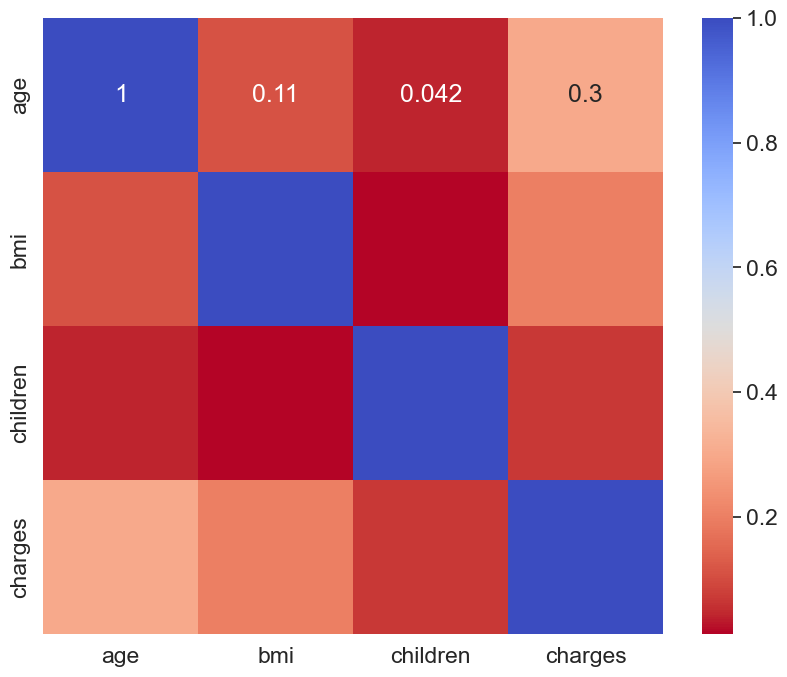

In [16]:
# <write your code here>

what is your analysis based on the resulting plot?

**write your answer here**

**Relationship between Age and Charges.**

#### 2.4 Convert age into bins/groups [3 Points]

Your task here is to first convert the age into bins/groups of categorical variables like Young Adult (17 < age <= 30), Adult (age <= 59) and Old (age > 59) to analyse its relationship with medical expenses "charges". Store the updated age column into 'age_cat'.

In [26]:
# <write your code here>

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult


#### 2.5 Count the unique values of age_cat features [3 Points]

In [ ]:
# <write your code here>

#### 2.6 Create a pie chart showing the percentage distribution of each of the three age groups (hint: use pie() of the matplotlib) [3 Points]

age_cat
Adult          780
Young Adult    444
Old            114
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7fc33ad7fd30>,
 [Text(-0.30922189662362254, 1.159474802938162, 'Young Adult'),
  Text(-0.007748139924787676, -1.0999727116286595, 'Adult'),
  Text(1.0608289775377782, -0.29093277645557974, 'Old')],
 [Text(-0.18037943969711315, 0.6763603017139278, '58.3%'),
  Text(-0.004226258140793277, -0.5999851154338142, '33.2%'),
  Text(0.5786339877478789, -0.1586906053394071, '8.5%')])

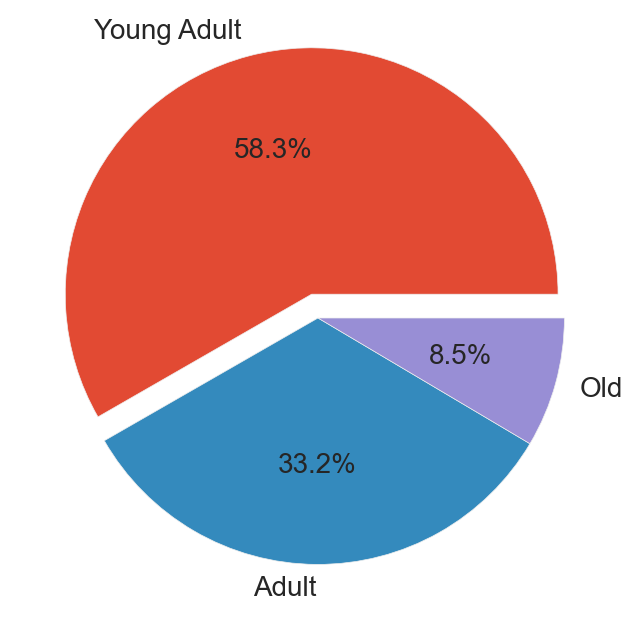

**what do you conclude based on the obtained pie chart?**

write your answer here

#### 2.7 Convert the charges to log scale (hint: use np.log()) [3 Points]

We have seen that charges have outliers so we do a log transformation of charges to get rid of the impact of outliers.

In [30]:
# <write your code here>

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867


#### 2.7 Plot the change of the charges (original vs log scale) using the hist() function [3 Points]

In [8]:
# <write your code here>

#### 2.8 Convert BMI To Categorical [3 Points]

Your task here is to convert the BMI feature into bins/groups. Therefore, we will count on the bmi ranges to create a new feature named 'bmi_cat', that hold the following values based on the age: 

1. bmi < 19: bmi_cat = Underweight
2. 19 <= bmi <= 25: bmi_cat = Normal
3. 25 < bmi <= 30: bmi_cat = Overweight
4. bmi > 30: bmi_cat = Obese

(hint: use the loc() of pandas. Example: raw_data.loc[(raw_data.age<19), "bmi_cat"]="Underweight")

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927,Underweight
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233,Underweight
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867,Normal


#### 2.9 Plot a Bar plot for the distribution of the obtained bmi_cat categories (hint: get the unique values of each category and pass them to the bar() function) [3 Points]

Text(0, 0.5, 'Count')

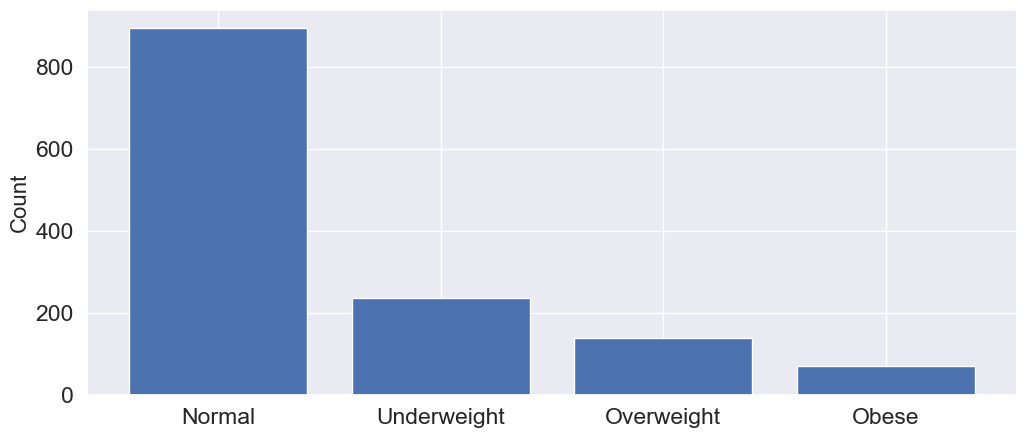

In [40]:
# <write your code here>

### Standardization of Data

Standard scaling is required to bring all the variables to the same page. *BMI* and *Age* range in tens where as *Children* range in once while *Charges* ranged in 5 digits. Thus to keep all on same page we use the standard scaler.

Standardize features by removing the mean and scaling to unit variance

$$z=(x-u)/sd$$

#### 2.10 Use the StandardScaler to scale the raw_data_c that includes (age, bmi, children, and charges) [3 Points]
Store the scaled data into variable: 'raw_data_std'

In [47]:
# <write your code here>

columns as age, bmi. children, charges
[[-1.43876426 -0.45332    -0.90861367  0.2985838 ]
 [-1.50996545  0.5096211  -0.07876719 -0.95368917]
 [-0.79795355  0.38330685  1.58092576 -0.72867467]
 ...
 [-1.50996545  1.0148781  -0.90861367 -0.96159623]
 [-1.29636188 -0.79781341 -0.90861367 -0.93036151]
 [ 1.55168573 -0.26138796 -0.90861367  1.31105347]]


### 3. KMeans Clustering 

Using KMeans and Silhoutte scores

To find the best number of cluster (n_clusters=k) we run a for-loop and compute the WSS (Within sum of squares) Elbow method and Silhoutte scores for each "k".

**We will rely on bmi and charges to perform clustering**

**Here is how we get the data**

In [48]:
bmi_charg_c=raw_data_std[:,[1,3]]
print(bmi_charg_c)
print(bmi_charg_c.shape)

[[-0.45332     0.2985838 ]
 [ 0.5096211  -0.95368917]
 [ 0.38330685 -0.72867467]
 ...
 [ 1.0148781  -0.96159623]
 [-0.79781341 -0.93036151]
 [-0.26138796  1.31105347]]
(1338, 2)


#### 3.1 Perform KMeans for different values of K(from 2 to 16) and keep a record of the WSS and Silhouette scores. [10 Points]

(hint: Create a look from 2 to 16, apply kmeans on the data, obtain wss from inertia_ feature and the silhouetter_score (already impored above). Store these scores in a list (wss and sil))

In [9]:
# <write your code here>

#### You should obtain a plot like the following if you run the code:

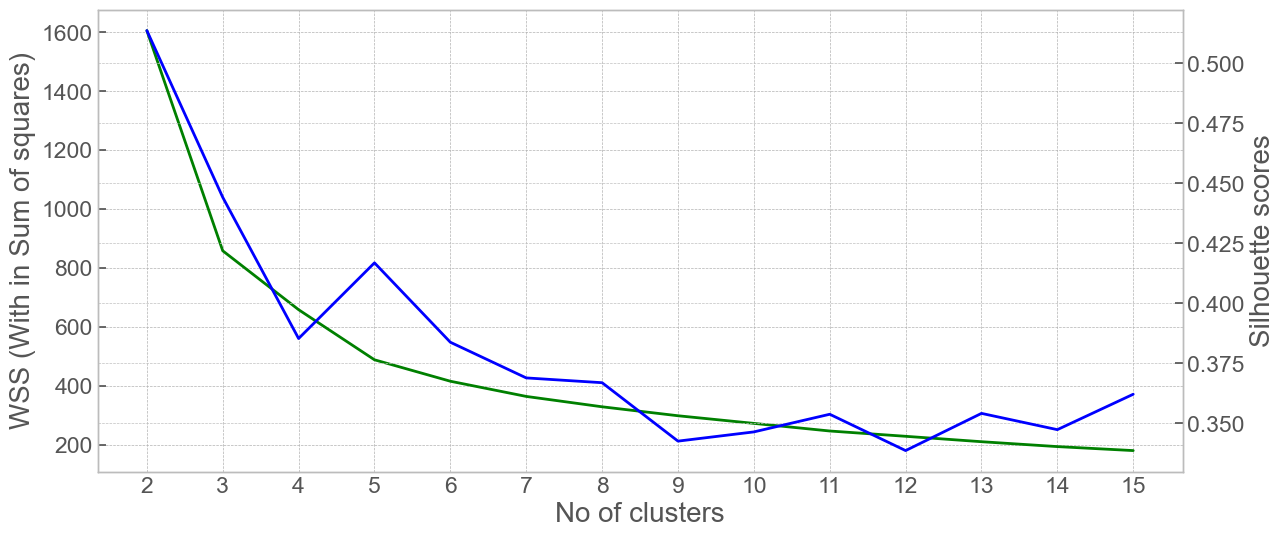

In [50]:
k=range(2,16)
style.use("bmh")
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

#### 3.2 Analyse the plot and get the best elbow value, then create a KMeans cluster with the best value of K [6 Points]

In [11]:
# <write your code here>

#### 3.3 Based on the obtained centroids from clustering, append a cluster ID to each row in the original raw_data [5 Points]

In [12]:
# <write your code here>

#### 3.4 Create a scatter plot of the BMI vs Charges where you color every sample according to the cluster it belongs to [6 Points]

(Hint: Use the scatter function of the matplotlib package for each cluster to plot in different colors.)

In [14]:
# <write your code here>

**Interpret the obtained results**

Is there a relation between BMI and Charges?

write your answer here

#### 3.5 Perform prediction for a new data sample [4 Points]

BMI = 38

Charges = 6000.0

### 4. DBSCAN

Your task in this part of the project is to perform DBSCAN clustering. You can use any method to get the best values of the epsilon and min_samples parameters.

Follow the same steps of KMeans:

1. Obtain a dataframe containing the BMI and Charges
2. Apply DBSCAN on the data [5 Points]
3. Fine tune the hyperparemeters (you might want to use the silhouette score) [12 Points]
4. Plot the data samples, colored by the cluster it belongs to [6 Points]
5. Did you get a better cluster compared to KMeans? [5 Points]
6. Perform the prediction using a new data sample (BMI=38 and Charges=6000) [4 Points]